<a href="https://colab.research.google.com/github/khandelwala812/vitality/blob/main/AppleML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Get access to Google Drive Folders
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import all the important dependencies
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing import image
import numpy as np

In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

# Load the MobileNetV2 model from tensorflow and freeze all its layers
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
for layer in base_model.layers:
    layer.trainable = False

# Create the model
model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Image data generator for data augmentation and normalization
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
train_generator = train_datagen.flow_from_directory('/content/drive/MyDrive/FreshImg', target_size=(224, 224), batch_size=32, class_mode='binary')

# Train the model
model.fit(train_generator, epochs=10)

Found 1025 images belonging to 2 classes.
Epoch 1/10
33/33 [==============================] - 70s 2s/step - loss: 0.4611 - accuracy: 0.7805
Epoch 2/10
33/33 [==============================] - 76s 2s/step - loss: 0.2275 - accuracy: 0.9395
Epoch 3/10
33/33 [==============================] - 66s 2s/step - loss: 0.1666 - accuracy: 0.9561
Epoch 4/10
33/33 [==============================] - 64s 2s/step - loss: 0.1368 - accuracy: 0.9717
Epoch 5/10
33/33 [==============================] - 66s 2s/step - loss: 0.1197 - accuracy: 0.9659
Epoch 6/10
33/33 [==============================] - 67s 2s/step - loss: 0.1063 - accuracy: 0.9727
Epoch 7/10
33/33 [==============================] - 64s 2s/step - loss: 0.0918 - accuracy: 0.9756
Epoch 8/10
33/33 [==============================] - 65s 2s/step - loss: 0.0916 - accuracy: 0.9727
Epoch 9/10
33/33 [==============================] - 64s 2s/step - loss: 0.0820 - accuracy: 0.9766
Epoch 10/10
33/33 [==============================] - 73s 2s/step - loss: 0.0

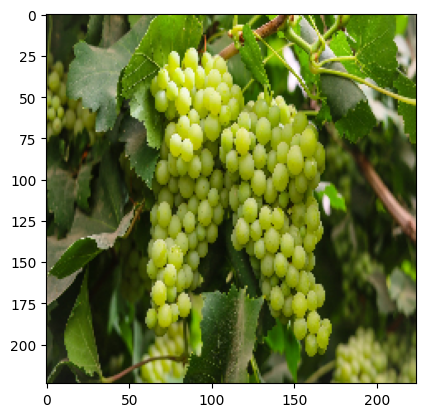

1/1 [==============================] - 0s 68ms/step
0.045292273
Fresh


In [ ]:
# A way to input new images and test the model
img_path = '/content/drive/MyDrive/TestImg/fGrapes2.jpg'
img = image.load_img(img_path, target_size=(224, 224))

# Show the input image scaled to 224x224
plt.imshow(img)
plt.show()
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255.0  # Normalize the image

# Predict the image and show its prediction percent
prediction = model.predict(img_array)
print(prediction[0][0])
if prediction[0][0] < 0.5:
    print("Fresh")
else:
    print("Molded")

In [ ]:
# Save the model into a directory
from tensorflow.keras.models import save_model
save_model(model, '/content/drive/MyDrive/Models/AppleFreshnessDetection')

In [ ]:
# Load the model from a directory
model = tf.keras.models.load_model('/content/drive/MyDrive/Models/AppleFreshnessDetection')